In [1]:
import glob
import os
import time
import datetime

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
from astropy.io import fits

from matplotlib import animation, rc
from IPython.display import HTML

%matplotlib inline

In [2]:
def nsf(num, n=1):
    """n-Significant Figures"""
    numstr = ("{0:.%ie}" % (n-1)).format(num)
    return float(numstr)

def num_err(num, err, n=1):
    '''Return number rounded based on error'''
    return np.around(num,int(-(np.floor(np.log10(nsf(err,n=n)))))), nsf(err,n=n)

def clip(data, sigma=3):
    """Remove all values above a threshold from the array.
    Uses iterative clipping at sigma value until nothing more is getting clipped.
    Args:
        data: a numpy array
    """
    data = data[np.isfinite(data)]
    raveled = data.ravel()
    median = np.median(raveled)
    std = np.nanstd(raveled)
    newdata = raveled[np.abs(raveled-median) <= sigma*std]
    if len(newdata) and len(newdata) != len(raveled):
        return clip(newdata, sigma)
    else:
        return newdata

def init():
    '''
    Initialise first frame with first image
    '''
    ttl_hi.set_text('')
    tt2_hi.set_text('')
    im_hi.set_array(f(glob.glob(f_images_hi[0])[0]))
    
    ttl_lo.set_text('')
    tt2_lo.set_text('')
    im_lo.set_array(f(glob.glob(f_images_lo[0])[0]))
    
    return (im,)


def f(filename):
    '''
    Frame update function
    '''
    return fits.open(filename)[0].data[0,0,:,:]
    
#     img = fits.open(filename)[0].data[0,0,:,:]/np.nanmean(clip(fits.open(filename)[0].data[0,0,:,:]))
#     clip_img = clip(img)
    
#     return np.clip(img, np.nanmean(clip_img)-5*np.nanstd(clip_img), np.nanmean(clip_img)+5*np.nanstd(clip_img))


def updatefig(i, *args):
    '''
    Update image data for frame.
    '''
    sig_lim = 0.8
    lo_fname = glob.glob(f_images_lo[i])[0]
    img = f(lo_fname)
    im_lo.set_array(img)
    im_lo.set_clim(np.nanmean(img)-sig_lim*np.nanstd(img),np.nanmean(img)+sig_lim*np.nanstd(img))
    
    ttl_lo.set_text(os.path.basename(lo_fname)[:10])
    tt2_lo.set_text(os.path.basename(lo_fname)[11:19])
    tt3_lo.set_text(os.path.basename(lo_fname)[20:24])
    
    hi_fname = glob.glob(f_images_hi[i])[0]
    
    img = f(hi_fname)
    im_hi.set_array(img)
    im_hi.set_clim(np.nanmean(img)-sig_lim*np.nanstd(img),np.nanmean(img)+sig_lim*np.nanstd(img))
    ttl_hi.set_text(os.path.basename(hi_fname)[:10])
    tt2_hi.set_text(os.path.basename(hi_fname)[11:19])
    tt3_hi.set_text(os.path.basename(hi_fname)[20:24])
    
    i += 1
    return im_lo, ttl_lo, tt2_lo, im_hi, ttl_hi, tt2_hi

## ls /data/* -darth


In [3]:
# Images to make frames

# images_hi = np.array(sorted(glob.glob("/data/AS_201702250130/2017-02-25T03:21:[2,3,4]*S314*")))
# images_lo = np.array(sorted(glob.glob("/data/AS_201702250130/2017-02-25T03:21:[2,3,4]*S296*")))

# images_hi = np.array(sorted(glob.glob("/data/AS_201702250130/2017-02-25T0[3,4,5]:*:[0,3]0-S314*")))
# images_lo = np.array(sorted(glob.glob("/data/AS_201702250130/2017-02-25T0[3,4,5]:*:[0,3]0-S296*")))

# 2016-08-31 16:36:00
        
# images_hi = np.array(sorted(glob.glob("/data/AS_20190101/2019-01-01T0[1,2,3]:??:[0,2,4]0*S3*")))
# images_lo = np.array(sorted(glob.glob("/data/AS_20190101/2019-01-01T0[1,2,3]:??:[0,2,4]0*S2*")))
# images_hi = np.array(sorted(glob.glob("/data/20190207/*T0[4,5,6,7]:??:[0,3]0*S3*")))
# images_lo = np.array(sorted(glob.glob("/data/20190207/*T0[4,5,6,7]:??:[0,3]0*S2*")))

# images_hi_1 = np.array(sorted(glob.glob("/data/ASf_201804141730/*14T18:??:30-S3*.fits")))
# images_hi_1 = np.append(images_hi_1, np.array(sorted(glob.glob("/data/ASf_201804141730/*14T19:??:30-S3*.fits"))))
# images_hi_1 = np.append(images_hi_1, np.array(sorted(glob.glob("/data/ASf_201804141730/*14T20:??:30-S3*.fits"))))
# images_hi_1 = np.append(images_hi_1, np.array(sorted(glob.glob("/data/ASf_201804141730/*14T21:??:30-S3*.fits"))))

images_hi_1 = np.array(sorted(glob.glob("/data/20190330/2019-03-31*T??:??:[0,2,4]0-S3*.fits")))

# images_lo_1 = np.array(sorted(glob.glob("/data/ASf_201804141730/*14T18:??:30-S2*.fits")))
# images_lo_1 = np.append(images_lo_1, np.array(sorted(glob.glob("/data/ASf_201804141730/*14T19:??:30-S2*.fits"))))
# images_lo_1 = np.append(images_lo_1, np.array(sorted(glob.glob("/data/ASf_201804141730/*14T20:??:30-S2*.fits"))))
# images_lo_1 = np.append(images_lo_1, np.array(sorted(glob.glob("/data/ASf_201804141730/*14T21:??:30-S2*.fits"))))

images_lo_1 = np.array(sorted(glob.glob("/data/20190330/2019-03-31*T??:??:[0,2,4]0-S2*.fits")))

# images_hi = np.array(sorted(glob.glob("/data/AS_201702270350/2017-02-27T*:*:[0,3]0-S314*")))
# images_lo = np.array(sorted(glob.glob("/data/AS_201702270350/2017-02-27T*:*:[0,3]0-S296*")))


print "Original:\t", len(images_hi_1), len(images_lo_1)


hi_imag_times_1 = [os.path.basename(x)[:19] for x in images_hi_1]
lo_imag_times_1 = [os.path.basename(x)[:19] for x in images_lo_1]

common_times_1 = np.sort(list(set(hi_imag_times_1) & set(lo_imag_times_1)))


f_images_hi = [os.path.dirname(images_hi_1[0])+"/"+x+"*S3*" for x in common_times_1 ]
f_images_lo = [os.path.dirname(images_lo_1[0])+"/"+x+"*S2*" for x in common_times_1 ]


# f_images_hi_1 = [os.path.dirname(images_hi_1[0])+"/"+x+"*S3*" for x in common_times_1 ]
# f_images_lo_1 = [os.path.dirname(images_lo_1[0])+"/"+x+"*S2*" for x in common_times_1 ]

# # print "Matched:\t", len(f_images_hi), len(f_images_lo)



# images_hi_2 = np.array(sorted(glob.glob("/data/20190303/*T[0,1][0,1,2,3,4,5]:??:[0,3]0-S3*.fits")))
# images_lo_2 = np.array(sorted(glob.glob("/data/20190303/*T[0,1][0,1,2,3,4,5]:??:[0,3]0-S2*.fits")))

# print "Original:\t", len(images_hi_2), len(images_lo_2)

# hi_imag_times_2 = [os.path.basename(x)[:19] for x in images_hi_2]
# lo_imag_times_2 = [os.path.basename(x)[:19] for x in images_lo_2]

# common_times_2 = np.sort(list(set(hi_imag_times_2) & set(lo_imag_times_2)))

# f_images_hi_2 = [os.path.dirname(images_hi_2[0])+"/"+x+"*S3*" for x in common_times_2 ]
# f_images_lo_2 = [os.path.dirname(images_lo_2[0])+"/"+x+"*S2*" for x in common_times_2 ]

# f_images_hi = np.append(f_images_hi_1, f_images_hi_2)
# f_images_lo = np.append(f_images_lo_1, f_images_lo_2)
  
print "Matched:\t", len(f_images_hi), len(f_images_lo)



Original:	194 194
Matched:	194 194


In [46]:
177+294

471

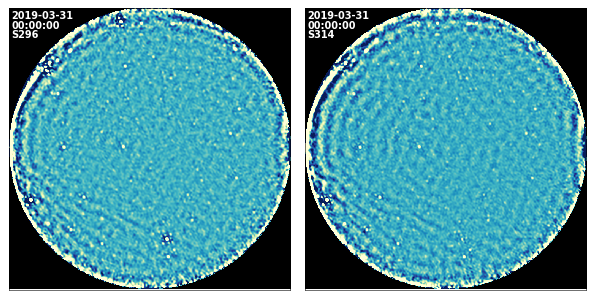

In [4]:
cmap = matplotlib.cm.YlGnBu_r
cmap.set_bad('black')

fig = plt.figure(figsize=(12,6), dpi=50)

plt.xticks([])
plt.yticks([])
plt.rcParams['figure.facecolor'] = 'black'


sig_limit = 10

i = 0
first_img = f(glob.glob(f_images_hi[0])[0])


plt.subplot(122)
im_hi = plt.imshow(first_img ,  animated=True, cmap=cmap, origin='lower')
# im_hi.set_clim(np.nanmean(first_img )-sig_limit*np.nanstd(first_img ),np.nanmean(first_img )+sig_limit*np.nanstd(first_img ))

ttl_hi = plt.text(10., 985, '', color="white", fontsize=14, weight="bold")
tt2_hi = plt.text(10., 950, '', color="white", fontsize=14, weight="bold")
tt3_hi = plt.text(10., 915, '', color="white", fontsize=14, weight="bold")
plt.xticks([])
plt.yticks([])

first_img = f(glob.glob(f_images_lo[0])[0])
plt.subplot(121)
im_lo = plt.imshow(first_img, animated=True, cmap=cmap, origin='lower')


# im_lo.set_clim(np.nanmean(first_img )-sig_limit*np.nanstd(first_img ),np.nanmean(first_img )+sig_limit*np.nanstd(first_img ))

ttl_lo = plt.text(10., 985, '', color="white", fontsize=14, weight="bold")
tt2_lo = plt.text(10., 950, '', color="white", fontsize=14, weight="bold")
tt3_lo = plt.text(10., 915, '', color="white", fontsize=14, weight="bold")
plt.xticks([])
plt.yticks([])
plt.tight_layout()

ani = animation.FuncAnimation(fig, updatefig, interval=100, frames=len(f_images_hi), blit=True)

In [5]:
# Breaks if too large
HTML(ani.to_html5_video())



In [58]:
#  Save video

t1 = time.time()
ani.save("/home/kuiack/20190113_scintillation_compare.mp4",
         codec="libx264", dpi=50, extra_args=['-pix_fmt', 'yuv420p'], bitrate=-1)

# print time.time() -  t1, "seconds for", len(images), "frames."

In [12]:
images_hi = np.array(sorted(glob.glob("/data/2016-09-05/*")))
print len(images_hi)

118


In [25]:
def nsf(num, n=1):
    """n-Significant Figures"""
    numstr = ("{0:.%ie}" % (n-1)).format(num)
    return float(numstr)

def num_err(num, err, n=1):
    '''Return number rounded based on error'''
    return np.around(num,int(-(np.floor(np.log10(nsf(err,n=n)))))), nsf(err,n=n)

def clip(data, sigma=3):
    """Remove all values above a threshold from the array.
    Uses iterative clipping at sigma value until nothing more is getting clipped.
    Args:
        data: a numpy array
    """
    data = data[np.isfinite(data)]
    raveled = data.ravel()
    median = np.median(raveled)
    std = np.nanstd(raveled)
    newdata = raveled[np.abs(raveled-median) <= sigma*std]
    if len(newdata) and len(newdata) != len(raveled):
        return clip(newdata, sigma)
    else:
        return newdata

def init():
    '''
    Initialise first frame with first image
    '''
    ttl_hi.set_text('')
    tt2_hi.set_text('')
    im_hi.set_array(f(images_hi[0]))
    
    return (im,)


def f(filename):
    '''
    Frame update function
    '''
    return fits.open(filename)[0].data[0,0,:,:]
    
#     img = fits.open(filename)[0].data[0,0,:,:]/np.nanmean(clip(fits.open(filename)[0].data[0,0,:,:]))
#     clip_img = clip(img)
    
#     return np.clip(img, np.nanmean(clip_img)-5*np.nanstd(clip_img), np.nanmean(clip_img)+5*np.nanstd(clip_img))


def updatefig(i, *args):
    '''
    Update image data for frame.
    '''
    sig_lim = 0.8
    img = f(images_hi[i])
    im_hi.set_array(img)
    im_hi.set_clim(np.nanmean(img)-sig_lim*np.nanstd(img),np.nanmean(img)+sig_lim*np.nanstd(img))
    bt = os.path.basename(images_hi[i])
    ttl_hi.set_text(bt[:4]+"-"+bt[4:6]+"-"+bt[6:8])
    tt2_hi.set_text(bt[8:10]+":"+bt[10:12]+":"+bt[12:14])
    tt3_hi.set_text(os.path.basename(images_hi[i])[18:22])
    
    i += 1
    return im_hi, ttl_hi, tt2_hi

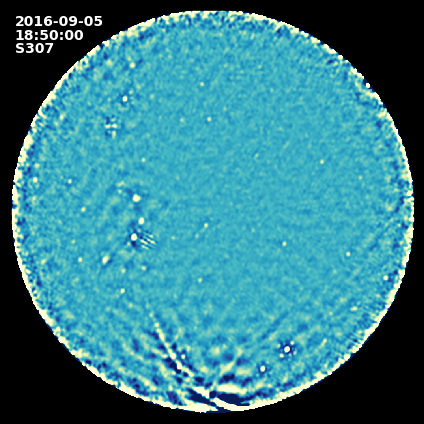

In [26]:
cmap = matplotlib.cm.YlGnBu_r
cmap.set_bad('black')

fig = plt.figure(figsize=(6,6))

plt.xticks([])
plt.yticks([])
plt.rcParams['figure.facecolor'] = 'black'


sig_limit = 10

i = 0
first_img = f(images_hi[i])


im_hi = plt.imshow(first_img ,  animated=True, cmap=cmap, origin='lower')
# im_hi.set_clim(np.nanmean(first_img )-sig_limit*np.nanstd(first_img ),np.nanmean(first_img )+sig_limit*np.nanstd(first_img ))

ttl_hi = plt.text(10., 985, '', color="white", fontsize=14, weight="bold")
tt2_hi = plt.text(10., 950, '', color="white", fontsize=14, weight="bold")
tt3_hi = plt.text(10., 915, '', color="white", fontsize=14, weight="bold")
plt.xticks([])
plt.yticks([])

first_img = f(images_hi[i])
plt.subplot(111)
plt.xticks([])
plt.yticks([])
plt.tight_layout()

ani = animation.FuncAnimation(fig, updatefig, interval=100, frames=len(images_hi), blit=True)

In [28]:
ani.save("/home/kuiack/20160905_scintilation.mp4")


# plot coordinates 

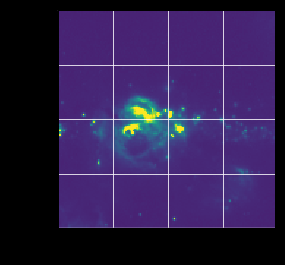

In [19]:
import matplotlib.pyplot as plt

from astropy.wcs import WCS
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename

filename = get_pkg_data_filename('galactic_center/gc_msx_e.fits')

hdu = fits.open(filename)[0]
wcs = WCS(hdu.header)

plt.subplot(projection=wcs)
plt.imshow(hdu.data, vmin=-2.e-5, vmax=2.e-4, origin='lower')
plt.grid(color='white', ls='solid')
plt.xlabel('Galactic Longitude')
plt.ylabel('Galactic Latitude')

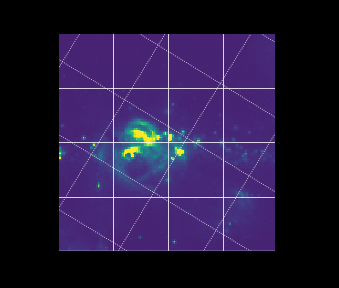

In [20]:
ax = plt.subplot(projection=wcs)

ax.imshow(hdu.data, vmin=-2.e-5, vmax=2.e-4, origin='lower')

ax.coords.grid(True, color='white', ls='solid')
ax.coords[0].set_axislabel('Galactic Longitude')
ax.coords[1].set_axislabel('Galactic Latitude')

overlay = ax.get_coords_overlay('fk5')
overlay.grid(color='white', ls='dotted')
overlay[0].set_axislabel('Right Ascension (J2000)')
overlay[1].set_axislabel('Declination (J2000)')

In [22]:
wcs

WCS Keywords

Number of WCS axes: 2
CTYPE : 'GLON-CAR'  'GLAT-CAR'  
CRVAL : 0.0  0.0  
CRPIX : 75.906999999999996  74.848500000000001  
NAXIS : 149  149

In [15]:
plt.subplot(projection=wcs)

ValueError: When providing two arguments, the array must be of shape (N, 4)

<Figure size 432x288 with 0 Axes>